In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from create_plots import import_dataframe, show_stats, show_plots

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Select the dataset name to evaluate:

In [2]:
#prefix="small_network"
#prefix="small_network_uniform"
prefix="small_network_uniform_larger_msa"
#prefix="medium_network_norandom"
#prefix="medium_network_norandom_uniform"
#prefix="medium_network_norandom_uniform_larger_msa"

#prefix="small_network_new"
#prefix="medium_network_norandom_new"

In [3]:
print("This evaluation is for: " + prefix)

This evaluation is for: small_network_uniform_larger_msa


In [4]:
df = import_dataframe(prefix)
print(df.columns)

Index(['name', 'n_taxa', 'n_trees', 'n_reticulations', 'msa_size',
       'sampling_type', 'simulation_type', 'celine_params', 'seqgen_params',
       'near_zero_branches_raxml', 'n_equal_tree_pairs',
       'true_network_weirdness', 'true_network_path', 'inferred_network_path',
       'likelihood_type', 'brlen_linkage_type', 'start_type', 'timeout',
       'n_random_start_networks', 'n_parsimony_start_networks',
       'runtime_inference', 'n_reticulations_inferred', 'bic_true',
       'logl_true', 'bic_inferred', 'logl_inferred', 'bic_raxml', 'logl_raxml',
       'rf_absolute_raxml', 'rf_relative_raxml', 'rf_absolute_inferred',
       'rf_relative_inferred', 'hardwired_cluster_distance',
       'softwired_cluster_distance', 'displayed_trees_distance',
       'tripartition_distance', 'nested_labels_distance',
       'path_multiplicity_distance', 'bic_diff', 'logl_diff'],
      dtype='object')


# Original Simulated Dataset Statistics 

<Figure size 1200x800 with 0 Axes>

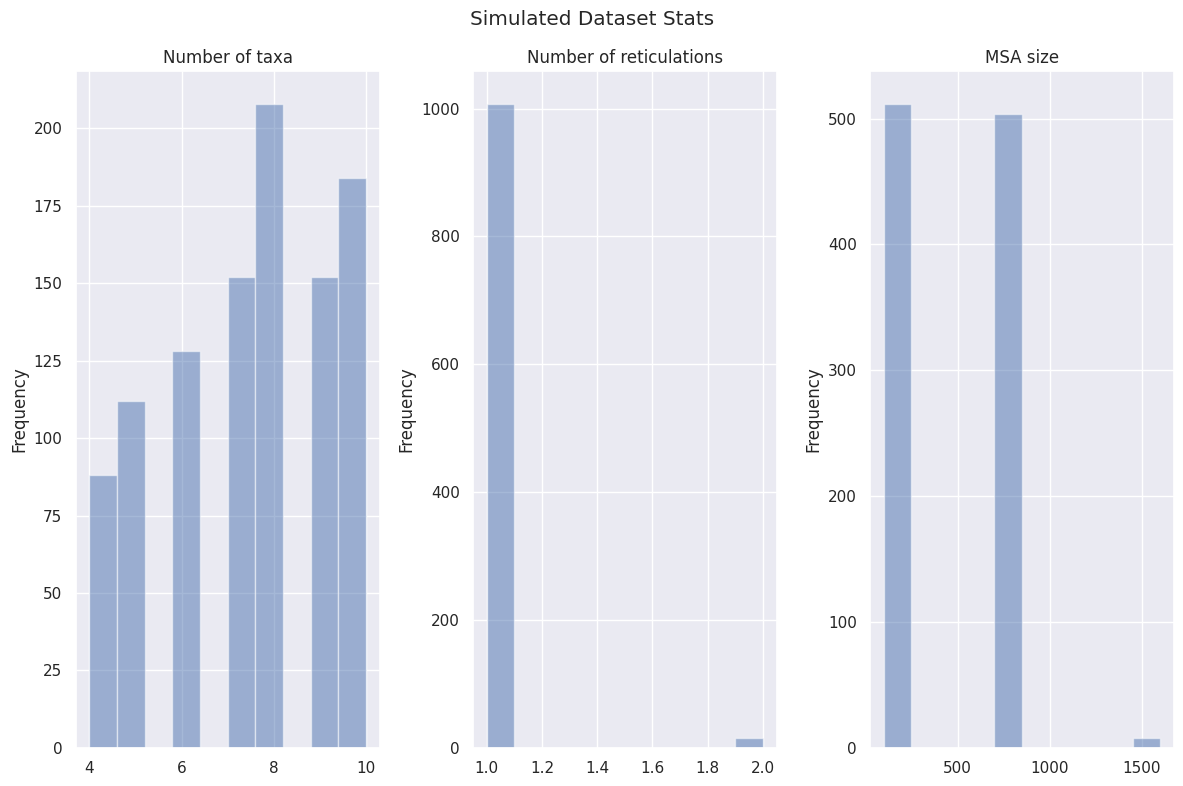

<Figure size 1200x800 with 0 Axes>

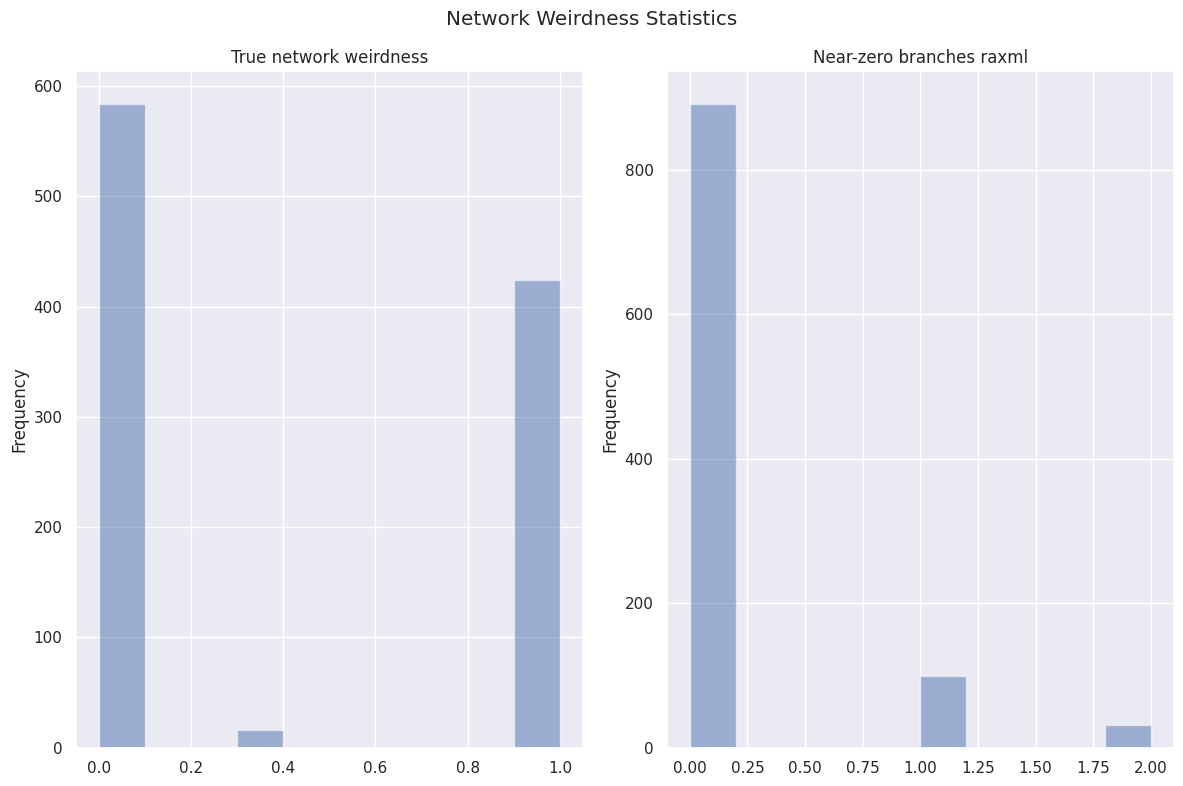

In [5]:
show_stats(df)

# Simulated dataset statistics after removing all "weird" networks and filtering out too tiny MSAs

<Figure size 1200x800 with 0 Axes>

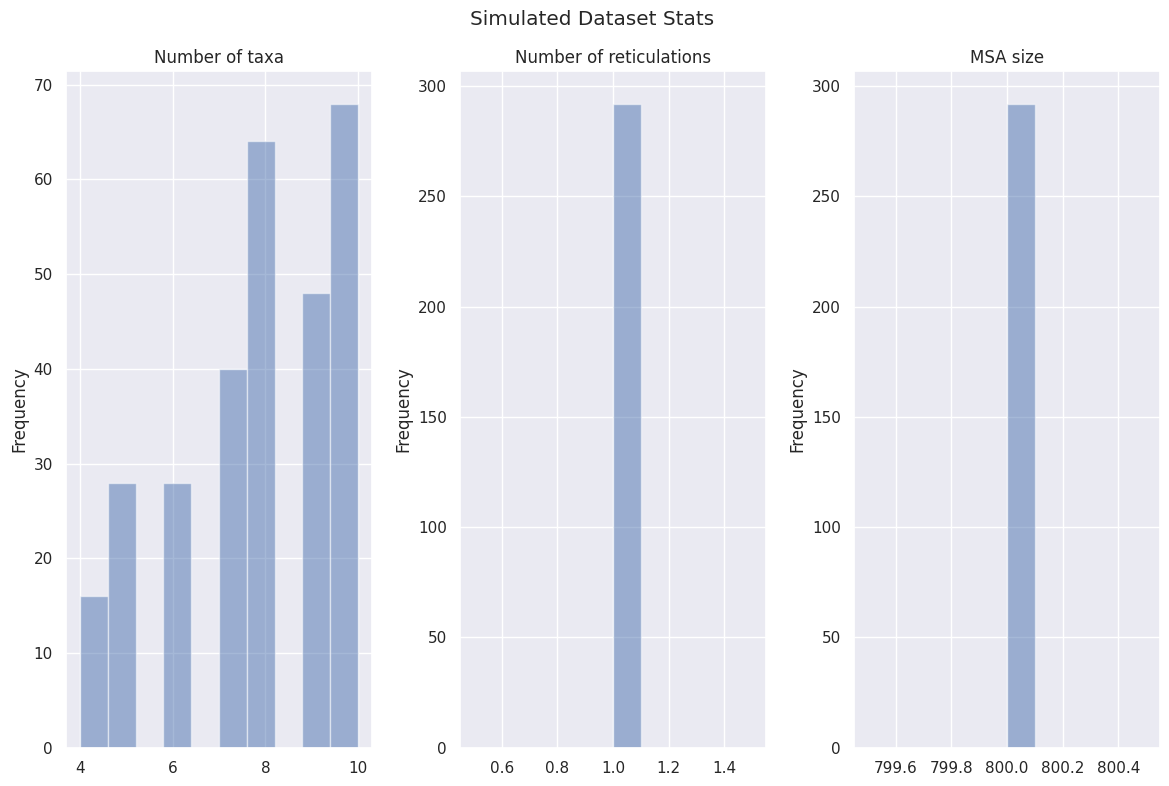

<Figure size 1200x800 with 0 Axes>

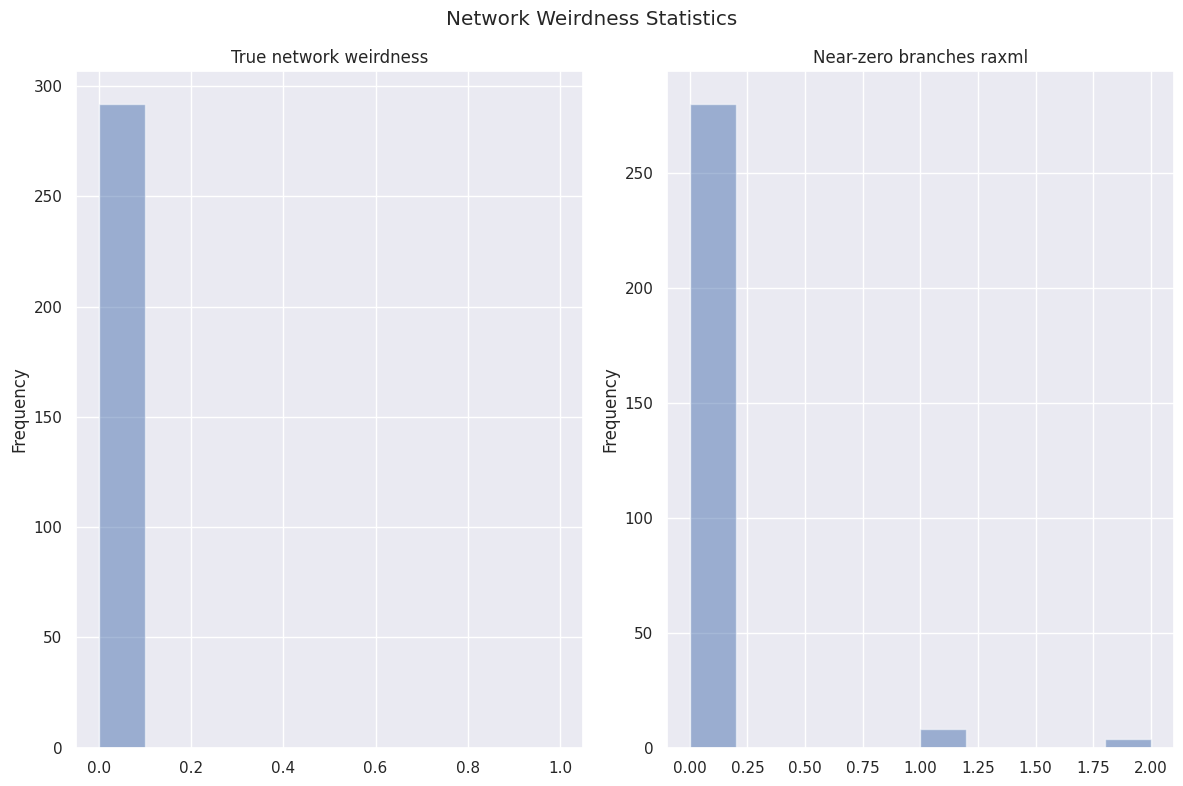

In [6]:
df_nonweird = df.query('(true_network_weirdness == 0.0) & msa_size >= 400')
show_stats(df_nonweird)

# Evaluation starting from raxml-ng best tree

146
+--------------------------------+------------------------+---------------------+--------------+
|                                | LikelihoodType.AVERAGE | LikelihoodType.BEST |   Overall    |
+--------------------------------+------------------------+---------------------+--------------+
|  Inferred BIC better or equal  |      41 (56.16 %)      |     45 (61.64 %)    | 86 (58.90 %) |
|       Inferred BIC worse       |      32 (43.84 %)      |     28 (38.36 %)    | 60 (41.10 %) |
| Inferred logl better or equal  |      27 (36.99 %)      |     30 (41.10 %)    | 57 (39.04 %) |
|      Inferred logl worse       |      46 (63.01 %)      |     43 (58.90 %)    | 89 (60.96 %) |
| Inferred n_reticulations less  |      26 (35.62 %)      |     29 (39.73 %)    | 55 (37.67 %) |
| Inferred n_reticulations equal |      43 (58.90 %)      |     42 (57.53 %)    | 85 (58.22 %) |
| Inferred n_reticulations more  |       4 (5.48 %)       |      2 (2.74 %)     |  6 (4.11 %)  |
+-------------------------

<Figure size 1200x800 with 0 Axes>

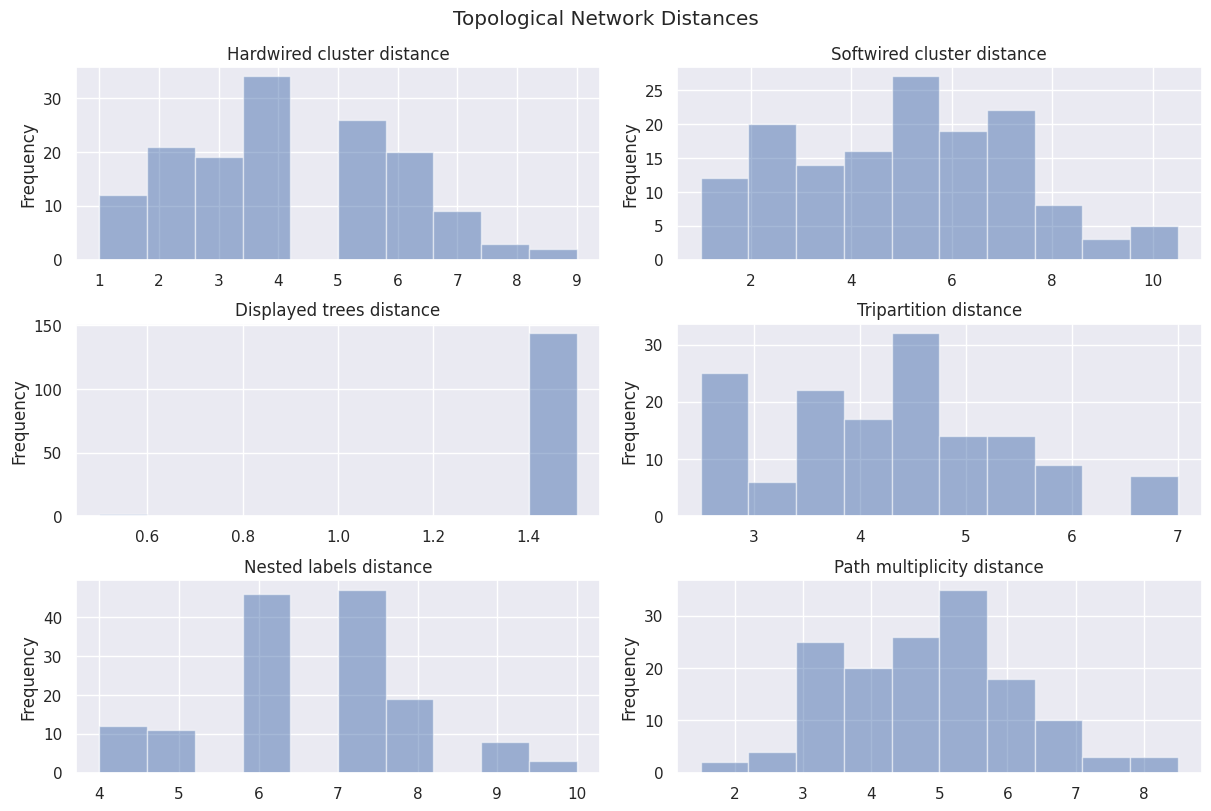

In [7]:
df_nonweird_start_from_raxml = df_nonweird.query('start_type == "FROM_RAXML"')
print(len(df_nonweird_start_from_raxml))
if len(df_nonweird_start_from_raxml) > 0:
    show_plots(df_nonweird_start_from_raxml)
else:
    print("No data found for StartType.FROM_RAXML")

# Evaluation starting from 5 random + 5 parsimony trees

512
+--------------------------------+------------------------+---------------------+---------------+
|                                | LikelihoodType.AVERAGE | LikelihoodType.BEST |    Overall    |
+--------------------------------+------------------------+---------------------+---------------+
|  Inferred BIC better or equal  |     248 (96.88 %)      |    249 (97.27 %)    | 497 (97.07 %) |
|       Inferred BIC worse       |       8 (3.12 %)       |      7 (2.73 %)     |  15 (2.93 %)  |
| Inferred logl better or equal  |     125 (48.83 %)      |    134 (52.34 %)    | 259 (50.59 %) |
|      Inferred logl worse       |     131 (51.17 %)      |    122 (47.66 %)    | 253 (49.41 %) |
| Inferred n_reticulations less  |     175 (68.36 %)      |    175 (68.36 %)    | 350 (68.36 %) |
| Inferred n_reticulations equal |      80 (31.25 %)      |     81 (31.64 %)    | 161 (31.45 %) |
| Inferred n_reticulations more  |       1 (0.39 %)       |      0 (0.00 %)     |   1 (0.20 %)  |
+---------------

<Figure size 1200x800 with 0 Axes>

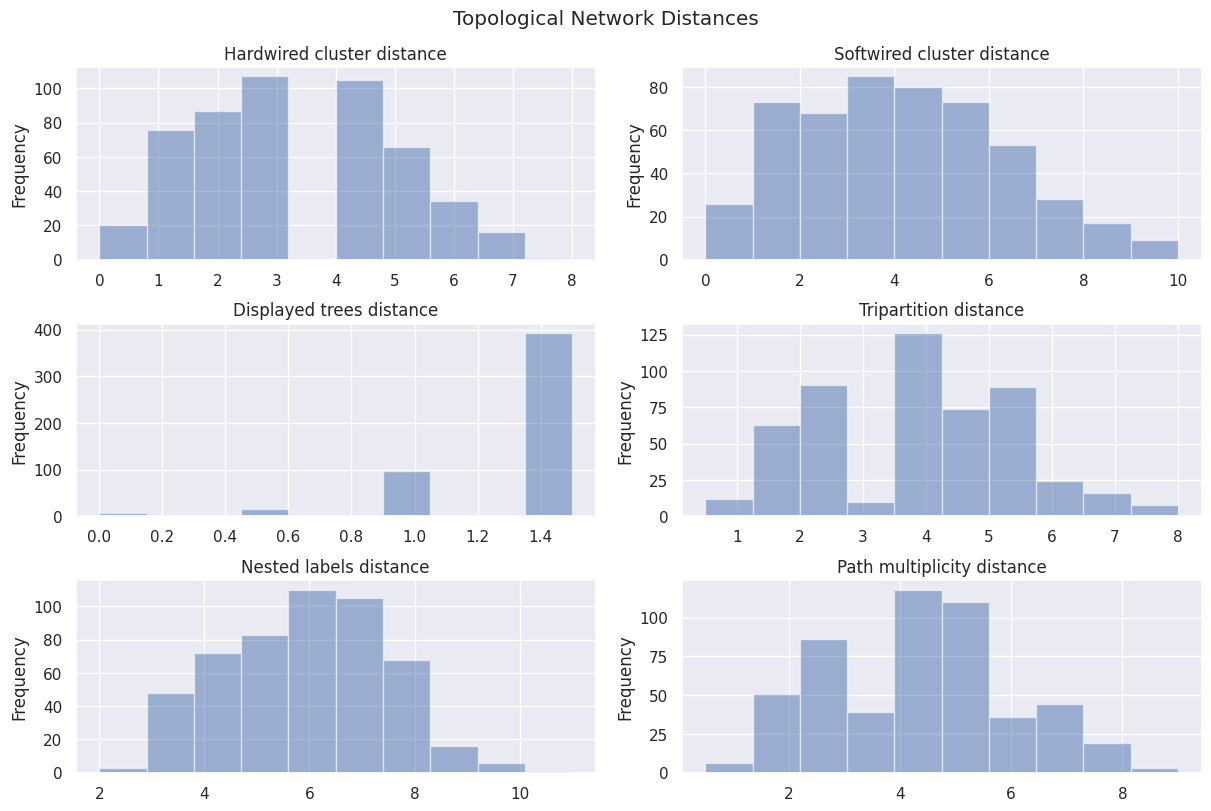

In [8]:
df_nonweird_random = df_nonweird.query('start_type == "RANDOM"')
print(len(df_nonweird_random))

if len(df_nonweird_random) > 0:
    show_plots(df_nonweird_random)
else:
    print("No data found for StartType.RANDOM")